# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь**

Выбираем случайно n векторов из исходной выборки и формируем матрицу X
$$ Q(X,w) = \frac{1}{n}*\sum_{i=1}^n(\vec{x_i}*\vec(w) - y_i)^2 + \frac{1}{C}*\sum_{i=1}^nw_i^2$$
$$ Q(X, w) = \frac{1}{n}*\sum_{i=1}^n((\vec{x_i}*\vec{w} - y_i)^2 + \frac{1}{C}*w^T*w)$$
$$ \nabla_{w}(L(w,x_i,y_i)) = \frac{2}{n}*\sum_{i=0}^n((\vec{x_i}*\vec{w} - y_i)*\vec{x_i}) + \frac{2}{C}*w$$
$$ \nabla_{w}(L(w,x_i,y_i)) = \frac{2}{n}*X^T*(X*w-y) + \frac{2}{C}*w$$
$$ w_{new} = w_{old} - \lambda*((\frac{2}{n}*X^T*X + \frac{2}{C}*I)*w_{old} - \frac{2}{n}*X^T*y)$$
Среднее вкладов каждого из признаков + веса

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$
$$R(w) =  \sum_{j=1}^{D}w_j^2$$
$$ L(w) = \frac{1}{n}*\sum_i^n(-y_i*log(1+exp(-\vec{x_i}*\vec{w})) + (1-y_i)(-\vec{x_i}*\vec{w}-log(1+exp(-\vec{x_i}*\vec{w}))) + \frac{2}{C}*\vec{w}*\vec{w}^T $$
После взятия производной и простых упрощений получим
$$\nabla_w = \frac{1}{n}*\sum_i^n(y_i*\vec{x_i} - \vec{x_i}*\sigma(\vec{x_i}*\vec{w})) + \frac{2}{C}*\vec{w} $$
$$ w_{new} = w_{old} - \alpha * \nabla_w $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
$$ Гессиан = X^T*X$$
    (Взял производную под w от того, что считали в классе)
Он определён положительно опредлён
$$ (X^T*X*x, x) = (X*x, X*x) > 0$$
$$ y_{presision} = (X^TX + \alpha*I)^{-1}*X^T*y$$
Матрица , которая возводится в -1 степень всегда будет обратима, т.к. к диагонали добавляются положительные числа

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
Возьмём производную по a
$$ p = p(y_i = 1 |x_i ) $$
$$\frac{dE(L | x_i)}{da} = -\frac{p}{a} + \frac{(1-p}{(1-a)} = \frac{a-p}{a*(1-a)}$$
a = p - экстремум
$$\frac{d^2E(L | x_i)}{da^2} = \frac{(a-p)^2 - p^2 + p}{a^2*(1-a)^2} > 0$$
т.к (a-p)^2 > 0 и  p - p^2 > 0 (т.к. p < 1). Значит достинается минимум

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
Нет, не нужно(честно). w0 вводится для учитывания свободного члена, зачем штрафовать за большое значение свободного члена. Мы хотим чтобы не было больших весов именно у признаков, чтобы маленькое изменение признака не вело к сильному изменению предсказания

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [11]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [12]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [13]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [14]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [15]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    ind = np.random.permutation(X.shape[0])
    if shuffle == True:
        X = X[ind]
        y = y[ind]
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield (X_batch, y_batch)
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [16]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    ## Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', porog=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.porog = porog
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            y_batch[y_batch == 0] = -1
            prediction = np.dot(X_batch, self.weights)
            loss = np.sum(((prediction - y_batch)**2)/ X_batch.shape[0]) + 1 / self.C * (self.weights[1:] ** 2).sum()
        if self.model_type == 'log':
            prediction = sigmoid(np.dot(X_batch, self.weights))
            class0cost = -y_batch * np.log(prediction)
            class1cost = (1 - y_batch) * np.log(1 - prediction)
            loss = class0cost - class1cost
            loss = loss.sum() / X_batch.shape[0] + (self.weights[1:]**2).sum() / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            y_batch[y_batch == 0] = -1
            prediction = np.dot(X_batch, self.weights)
            loss_grad = np.dot(X_batch.T, (prediction - y_batch)) * 2 / X_batch.shape[0] +  self.weights * 2 / self.C 
        if self.model_type == 'log':
            prediction = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = np.dot(X_batch.T, prediction - y_batch)
            loss_grad /= X_batch.shape[0]
            loss_grad += 2 / self.C * self.weights
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        return self
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X), axis=1)
        self.weights = np.random.random_sample(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X), axis=1)
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights) > 0
        if self.model_type == 'log':
            y_hat = sigmoid(np.dot(X, self.weights)) > self.porog
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [55]:
def plot_decision_boundary(clf):
    plt.plot([i for i in np.arange(-2, 2, 1)], [(-clf.weights[0]-clf.weights[1] * i)/clf.weights[2] for i in np.arange(-2,2,1)], 
            label = model.model_type)
    plt.legend(loc='upper right')

In [56]:
from sklearn.metrics import f1_score

[-0.00075545  0.14763019 -0.05097517]
0.8976744186046511
[-0.00132099  0.3477458  -0.14016103]
0.9032258064516129


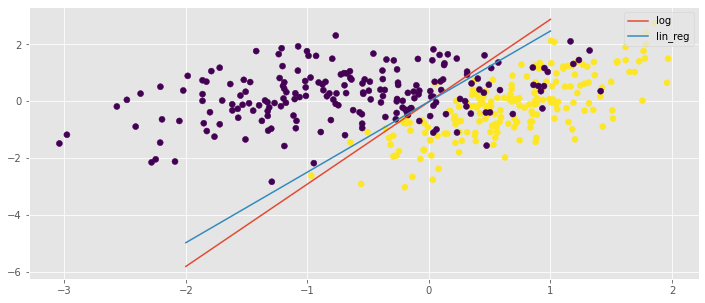

In [57]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)
X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=20), C=1, alpha=0.01
                        , max_epoch=10000, model_type='log')
model.fit(X, y)
print(model.weights)
print(f1_score(model.predict(X), y))
plot_decision_boundary(model)
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=20), C=1, alpha=0.01
                        , max_epoch=10000, model_type='lin_reg')
model.fit(X, y)
print(model.weights)
print(f1_score(model.predict(X), y))
plot_decision_boundary(model)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [20]:
from sklearn.datasets import make_classification


In [21]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [22]:
## Your Code Here
models = []
model1 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=5000), C=1000, alpha=0.01, max_epoch=10, model_type='log')
model1.fit(X,y)
model2 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=5000), C=1000, alpha=0.05, max_epoch=10, model_type='log')
model2.fit(X,y)
model3 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=5000), C=1000, alpha=0.1, max_epoch=10, model_type='log')
model3.fit(X,y)
model4 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=5000), C=1000, alpha=0.15, max_epoch=10, model_type='log')
model4.fit(X,y)
model5 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=5000), C=1000, alpha=0.45, max_epoch=10, model_type='log')
model5.fit(X,y)

MySGDClassifier(C=1000, alpha=0.45,
                batch_generator=<function <lambda> at 0x7f0adc5e07a0>,
                model_type='log')

In [23]:
models = [model1, model2, model3, model4, model5]
print(model1.weights)
for model in models:
    print(model.weights)
    print(f1_score(model.predict(X), y))


[ 0.30051948  0.49005763  0.18096217  0.20356554  0.03667184 -0.38203405
  1.19130202  0.33837945  0.35641686  0.56489858  0.31080194]
[ 0.30051948  0.49005763  0.18096217  0.20356554  0.03667184 -0.38203405
  1.19130202  0.33837945  0.35641686  0.56489858  0.31080194]
0.8251926822676396
[ 0.15422071  0.14795196  0.3141411   0.37058666 -1.16915778 -0.48561703
  1.68205515  0.33116554  0.02565394  0.37790059  0.28458673]
0.9567722745597944
[ 0.49603884  0.16582955  0.22225018  0.14068471 -1.46958978 -0.53869814
  1.89163078  0.19821959 -0.18262538  0.23116976  0.17211354]
0.96976467694326
[ 0.6952986   0.05545601  0.09873874  0.09242903 -1.57458998 -0.57822534
  1.78189565 -0.004056   -0.3997053   0.08198773  0.09237445]
0.9762704959771871
[ 1.4456369   0.01291941  0.03106864 -0.01294442 -1.91561291 -0.81033328
  1.90690794  0.00668082 -0.96136235  0.01724657 -0.0027604 ]
0.9848926744103905


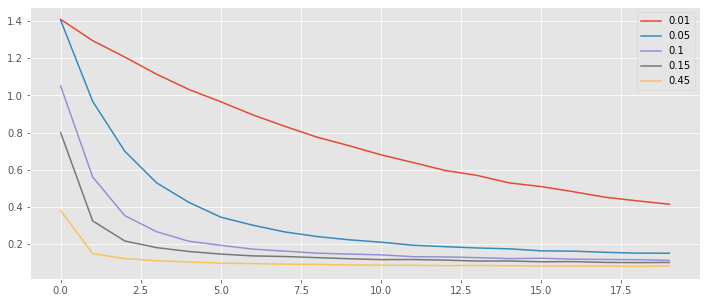

In [24]:
for model in models:
    a = np.array(model.errors_log['loss'])
    a = a.reshape(-1, 10).mean(axis=1)
    plt.plot(a, label = model.alpha)
    plt.legend(loc='upper right')

In [25]:
## Your Code Here
model1_lin = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=500), C=1000, alpha=0.01, max_epoch=10, model_type='lin_reg')
model1_lin.fit(X,y)
model2_lin = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=500), C=1000, alpha=0.05, max_epoch=10, model_type='lin_reg')
model2_lin.fit(X,y)
model3_lin = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=500), C=1000, alpha=0.1, max_epoch=10, model_type='lin_reg')
model3_lin.fit(X,y)
model4_lin = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=500), C=1000, alpha=0.15, max_epoch=10, model_type='lin_reg')
model4_lin.fit(X,y)
model5_lin = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=500), C=1000, alpha=0.2, max_epoch=10, model_type='lin_reg')
model5_lin.fit(X,y)
models_lin = [model1_lin, model2_lin, model3_lin, model4_lin, model5_lin]

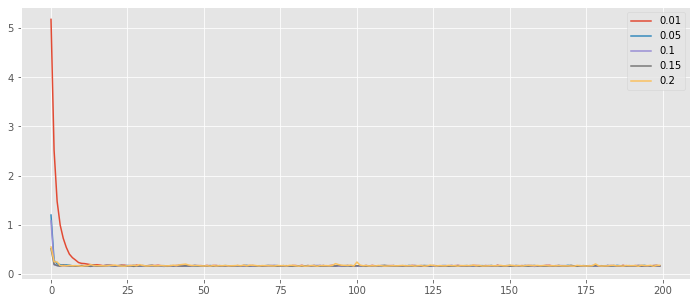

In [26]:
for model in models_lin:
    a = np.array(model.errors_log['loss'])
    a = a.reshape(-1, 10).mean(axis=1)
    plt.plot(a, label = model.alpha)
    plt.legend(loc='upper right')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?
Значения alpha следует выбирать небольшим. При больших может и не сходится

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [27]:
np.logspace(3, -3, 10)

array([1.00000000e+03, 2.15443469e+02, 4.64158883e+01, 1.00000000e+01,
       2.15443469e+00, 4.64158883e-01, 1.00000000e-01, 2.15443469e-02,
       4.64158883e-03, 1.00000000e-03])

(10,)
0.38534946550788923
0.2747541870129296
0.2985897035254471
0.35030146703482157
0.3813610107664626
0.23527087200516483
0.0481845556480695
-0.0017504235532254892
-0.0004137274886337581
-9.026996333785214e-05
0.9439629671915057


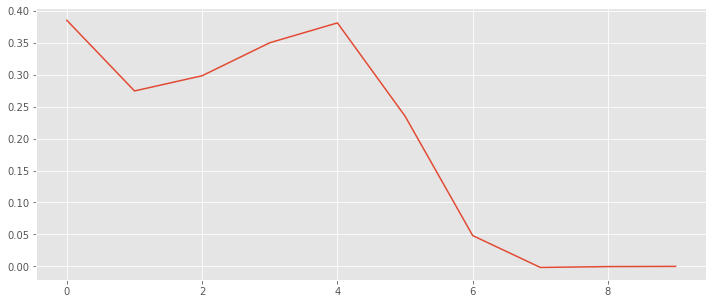

In [28]:
## Your Code Here
models
print(np.logspace(3, -3, 10).shape)
ploting = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=10000), C=C, alpha=0.0001, max_epoch=100, model_type='lin_reg')
    model.fit(X, y)
    a = np.mean(np.array(model.weights))
    print(np.mean(a))
    if a is not None:
        ploting.append(a)
plt.plot(ploting)
print(f1_score(model.predict(X), y))

(10,)
0.4657790450475863
0.5597727648314694
0.5637069480981332
0.6368762032004305
0.6704985110617969
0.5872243708555073
0.4329319567868113
0.2583588713555874
0.008267823605191882
-2.278938605800132e-05
0.9435258705693081


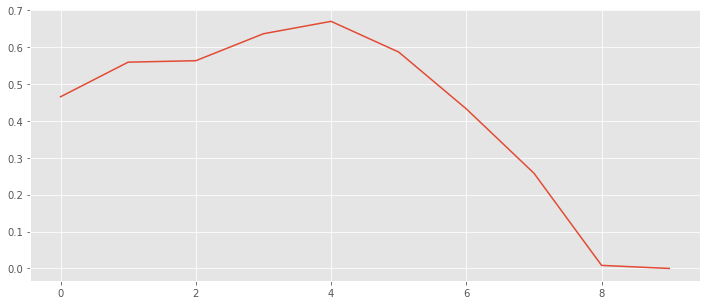

In [29]:
## Your Code Here
models
print(np.logspace(3, -3, 10).shape)
ploting = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=10000), C=C, alpha=0.0001, max_epoch=10, model_type='log')
    model.fit(X, y)
    a = np.mean(np.array(model.weights))
    print(np.mean(a))
    if a is not None:
        ploting.append(a)
plt.plot(ploting)
print(f1_score(model.predict(X), y))

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 
доволен

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [30]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [31]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [32]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [33]:
#X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [34]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train.shape

(11690, 15)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [37]:
models = []
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=91), C=0.1, alpha=0.001, max_epoch=100, model_type='lin_reg')
model.fit(np.asarray(X_train), np.asarray(y_train))
res = model.predict(np.asarray(X_train))

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [46]:
kf = KFold(n_splits=4, shuffle=True)
accur_choose1 = []
my_clf = []
max_f_sc = 0
i = 0
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), C=0.1, alpha=0.001, max_epoch=100, model_type='lin_reg')
for alpha in [0.0001, 0.015, 0.01]:
    for C in np.arange(0.01, 1, 0.1):
        acc = 0
        i += 1
        model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=batch), C=C, alpha=alpha, max_epoch=50, model_type='lin_reg')
        acc = cross_val_score(model, X_train, y_train, cv=3, groups=groups_train, scoring='f1_macro').mean()
        if acc > max_f_sc:
            max_f_sc = acc
            opt_C = C
            opt_alpha = alpha
print(max_f_sc, opt_C, opt_alpha)
        

/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in multiply
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core

0.7255418791562157 0.21000000000000002 0.01


In [40]:
kf = KFold(n_splits=4, shuffle=True)
accur_choose1 = []
my_clf = []
max_f_sc = 0
i = 0
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), C=0.1, alpha=0.001, max_epoch=100, model_type='log')
for alpha in [0.0001, 0.015, 0.01]:
    for C in np.arange(0.01, 1, 0.1):
        acc = 0
        i += 1
        model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=batch), C=C, alpha=alpha, max_epoch=50, model_type='log')
        acc = cross_val_score(model, X_train, y_train, cv=3, groups=groups_train, scoring='f1_macro').mean()
        if acc > max_f_sc:
            max_f_sc = acc
            opt_C = C
            opt_alpha = alpha
print(max_f_sc, opt_C, opt_alpha)
        

/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
/home/vlad/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encoun

0.721464527283278 0.81 0.01


In [47]:
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), C=0.81, alpha=0.001, max_epoch=50, model_type='log')
model.fit(X_train, y_train)
model.weights

array([-0.0772742 ,  0.02818593,  0.03599258,  0.03804025,  0.03827098,
        0.03861939,  0.03852495,  0.03925738,  0.0387809 ,  0.0386036 ,
        0.03822572,  0.03826861,  0.03788101,  0.03761643,  0.03766457,
        0.03833277])

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [48]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, target))

In [49]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

(16627, 15) (16627,)


In [50]:
res = model.predict(X_test)
res.sum()

5617

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [51]:
answer = pd.DataFrame({'pair_id': np.asarray(test_data['pair_id']), 'target': list(map(int, res))})
answer = answer.set_index(['pair_id'])
answer.to_csv('sub.csv')

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***